# Praktikum 1

In [1]:
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Hitung error
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

# Output akhir
print("Prediksi:")
print(a2)

Epoch 0, Loss: 0.36321915228531726
Epoch 1000, Loss: 0.19075785818971425
Epoch 2000, Loss: 0.1528255327735752
Epoch 3000, Loss: 0.1399787492922459
Epoch 4000, Loss: 0.13468784352486152
Epoch 5000, Loss: 0.13199609199375484
Epoch 6000, Loss: 0.13041246658322295
Epoch 7000, Loss: 0.12938460860167594
Epoch 8000, Loss: 0.12866967395700113
Epoch 9000, Loss: 0.12814644201603553
Prediksi:
[[0.04049341]
 [0.49839509]
 [0.94284333]
 [0.50446088]]


Tugas 1

Final Loss (Hidden=2, Sigmoid): 0.1282265715241046
Final Loss (Hidden=3, Sigmoid): 0.0022974157268842183
Final Loss (Hidden=3, ReLU): 0.00035154169220683637

Predictions (Hidden=2, Sigmoid):
 [[0.05300868]
 [0.49554213]
 [0.95091319]
 [0.50319888]]

Predictions (Hidden=3, Sigmoid):
 [[0.02515564]
 [0.95263635]
 [0.95122343]
 [0.0627247 ]]

Predictions (Hidden=3, ReLU):
 [[0.02970009]
 [0.98605912]
 [0.98605934]
 [0.01163533]]


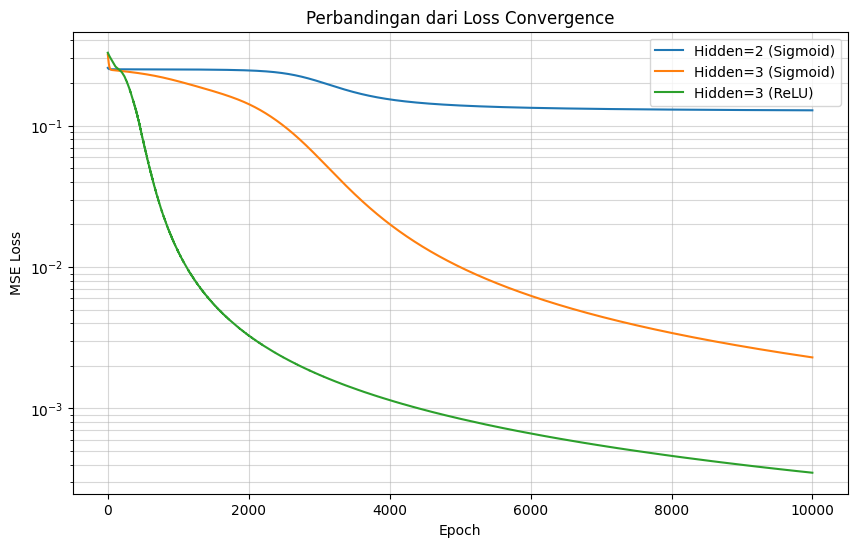

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Settings
epochs = 10000
lr = 0.1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def train_network(hidden_size, activation="sigmoid", seed=42):
    np.random.seed(seed)

    # Initialize weights
    W1 = np.random.randn(2, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, 1)
    b2 = np.zeros((1, 1))

    loss_history = []

    for epoch in range(epochs):
        # Forward
        z1 = np.dot(X, W1) + b1

        if activation == "sigmoid":
            a1 = sigmoid(z1)
        else: # ReLU
            a1 = relu(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2) # Output layer always sigmoid for XOR (0-1 range)

        # Error
        error = y - a2
        loss = np.mean(np.square(error))
        loss_history.append(loss)

        # Backprop
        d_a2 = error * sigmoid_derivative(a2)
        d_W2 = np.dot(a1.T, d_a2)
        d_b2 = np.sum(d_a2, axis=0, keepdims=True)

        if activation == "sigmoid":
            d_hidden = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
        else: # ReLU
            d_hidden = np.dot(d_a2, W2.T) * relu_derivative(a1)
            # Note: Technically relu_derivative should take z1, but (a1>0) <=> (z1>0) so it works here

        d_W1 = np.dot(X.T, d_hidden)
        d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

        # Update
        W1 += lr * d_W1
        b1 += lr * d_b1
        W2 += lr * d_W2
        b2 += lr * d_b2

    return loss_history, a2

# Run experiments
# 1. Base: Hidden=2, Sigmoid
hist_2_sig, pred_2_sig = train_network(2, "sigmoid")

# 2. Modified: Hidden=3, Sigmoid
hist_3_sig, pred_3_sig = train_network(3, "sigmoid")

# 3. Modified: Hidden=3, ReLU
hist_3_relu, pred_3_relu = train_network(3, "relu")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hist_2_sig, label='Hidden=2 (Sigmoid)')
plt.plot(hist_3_sig, label='Hidden=3 (Sigmoid)')
plt.plot(hist_3_relu, label='Hidden=3 (ReLU)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Perbandingan dari Loss Convergence')
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.savefig('loss_comparison.png')

print("Final Loss (Hidden=2, Sigmoid):", hist_2_sig[-1])
print("Final Loss (Hidden=3, Sigmoid):", hist_3_sig[-1])
print("Final Loss (Hidden=3, ReLU):", hist_3_relu[-1])

print("\nPredictions (Hidden=2, Sigmoid):\n", pred_2_sig)
print("\nPredictions (Hidden=3, Sigmoid):\n", pred_3_sig)
print("\nPredictions (Hidden=3, ReLU):\n", pred_3_relu)